In [40]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [41]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries, \
                              add_subplotlabels # set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 2 & tutorial name: nanosheared-electrolyte
figures will be saved in /docs/sphinx/source/tutorials/figures/level2/nanosheared-electrolyte/


In [42]:
log = lammps_logfile.File("log.lammps")
timestep = 0.5
if os.path.exists("log.lammps"):
    Time_0 = log.get("Step", run_num=0)*timestep
    TotEng_0 = log.get("TotEng", run_num=0)
    Time_1 = log.get("Step", run_num=1)*timestep
    TotEng_1 = log.get("TotEng", run_num=1)
    Time_2 = log.get("Step", run_num=2)*timestep
    TotEng_2 = log.get("TotEng", run_num=2)
    if os.path.exists("data_plot/") is False:
        os.mkdir("data_plot/")
    np.savetxt("data_plot/TotEng.dat", np.vstack([Time_0, TotEng_0, Time_1,
                                                  TotEng_1, Time_2, TotEng_2]).T)
else:
    Time_0, TotEng_0, Time_1, TotEng_1, Time_2, TotEng_2 = np.loadtxt("data_plot/TotEng.dat")

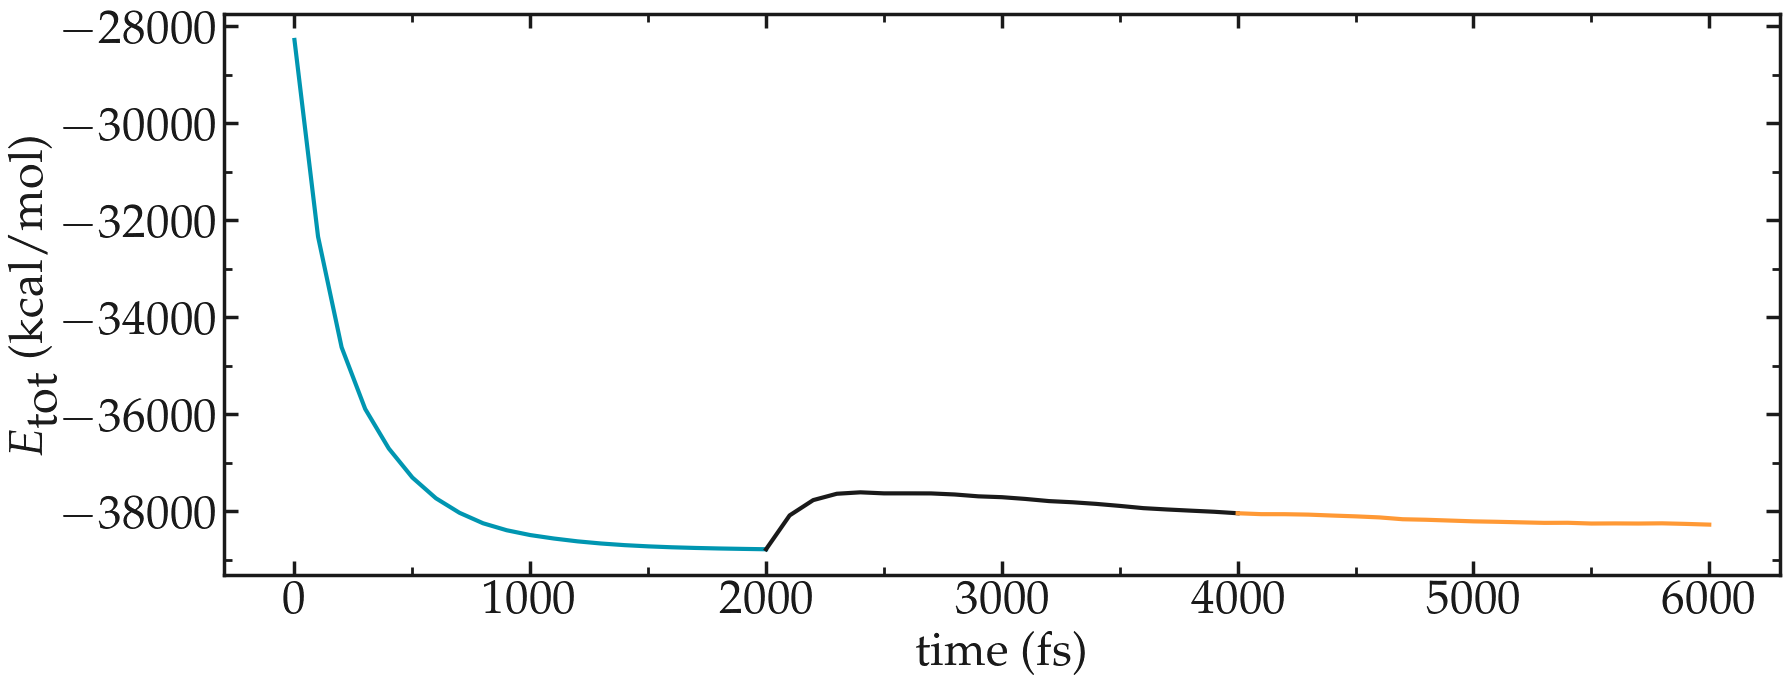

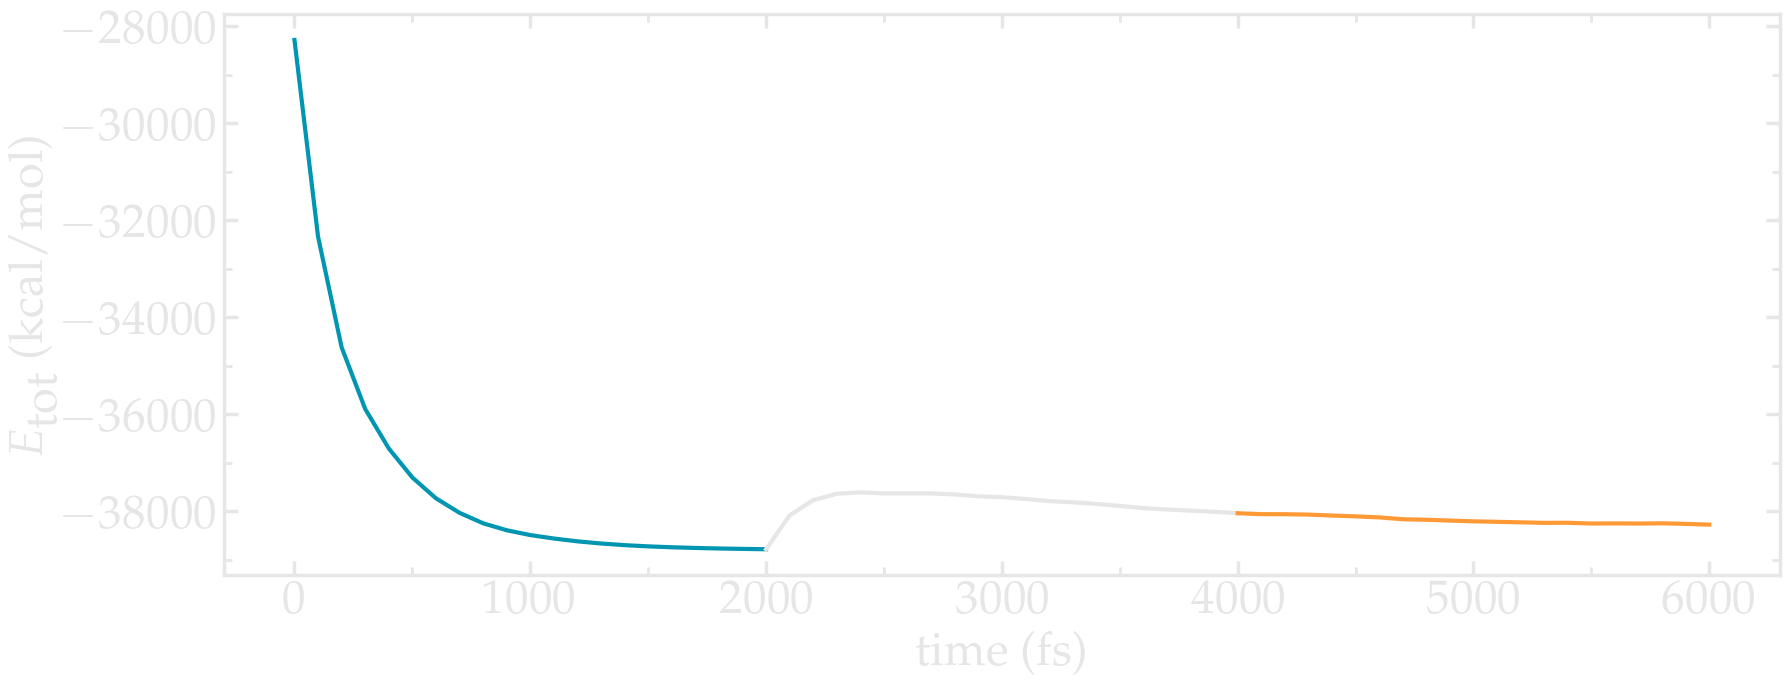

In [43]:
filename = "minimization"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,7))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(Time_0, TotEng_0, color=colors["myblue"], linewidth=3)
    ax[-1].plot(Time_1, TotEng_1, color=mygray, linewidth=3)
    ax[-1].plot(Time_2, TotEng_2, color=colors["myorange"], linewidth=3)
    complete_panel(ax[-1], r'time (fs)', r'$E_\textrm{tot}$ (kcal/mol)', legend=False, axis_color=mygray)
    #set_boundaries(plt, x_ticks=np.arange(0, 25, 5), x_boundaries=(0, 20),
    #               y_ticks=np.arange(-1, 1.5, 0.5), y_boundaries=(-1, 1))
    #add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)